<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [1]:
!pip install pandas

### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [4]:
#count the number
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
#Duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Number of duplicate rows: 20
       ResponseId                                         MainBranch  \
65437           1                     I am a developer by profession   
65438           2                     I am a developer by profession   
65439           3                     I am a developer by profession   
65440           4                              I am learning to code   
65441           5                     I am a developer by profession   
65442           6                        I code primarily as a hobby   
65443           7  I am not primarily a developer, but I write co...   
65444           8                              I am learning to code   
65445           9                        I code primarily as a hobby   
65446          10                     I am a developer by profession   
65447       18522                     I am a developer by profession   
65448       49767                        I code primarily as a hobby   
65449       51198                  

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [5]:
# Remove duplicate rows, excluding 'ResponseId'
df_cleaned = df.drop_duplicates(subset=[col for col in df.columns if col != 'ResponseId'])

# Display the result
print(f"Number of rows before removing duplicates: {len(df)}")
print(f"Number of rows after removing duplicates: {len(df_cleaned)}")


Number of rows before removing duplicates: 65457
Number of rows after removing duplicates: 64950


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [6]:
# Count missing values for each column
dict_missing_values = df_cleaned.isnull().sum().to_dict()

# Filter out columns with no missing values
dict_missing_values = {k: v for k, v in dict_missing_values.items() if v > 0}

# Print the dictionary
print("Missing values per column:")
print(dict_missing_values)

Missing values per column:
{'RemoteWork': 10546, 'CodingActivities': 10657, 'EdLevel': 4166, 'LearnCode': 4462, 'LearnCodeOnline': 15713, 'TechDoc': 24053, 'YearsCode': 5081, 'YearsCodePro': 13340, 'DevType': 5505, 'OrgSize': 17470, 'PurchaseInfluence': 17544, 'BuyNewTool': 19769, 'BuildvsBuy': 21592, 'TechEndorse': 21282, 'Country': 6020, 'Currency': 18266, 'CompTotal': 31210, 'LanguageHaveWorkedWith': 5205, 'LanguageWantToWorkWith': 9198, 'LanguageAdmired': 14078, 'DatabaseHaveWorkedWith': 14696, 'DatabaseWantToWorkWith': 22392, 'DatabaseAdmired': 26393, 'PlatformHaveWorkedWith': 22584, 'PlatformWantToWorkWith': 30418, 'PlatformAdmired': 33573, 'WebframeHaveWorkedWith': 19789, 'WebframeWantToWorkWith': 26415, 'WebframeAdmired': 30007, 'EmbeddedHaveWorkedWith': 42736, 'EmbeddedWantToWorkWith': 47350, 'EmbeddedAdmired': 48217, 'MiscTechHaveWorkedWith': 25507, 'MiscTechWantToWorkWith': 31986, 'MiscTechAdmired': 35354, 'ToolsTechHaveWorkedWith': 12468, 'ToolsTechWantToWorkWith': 18866, '

In [7]:
# Find the most frequent value in the column 'EdLevel'
most_frequent_value = df_cleaned['EdLevel'].mode()[0]

# Impute missing values in 'EdLevel' with the most frequent value
df_cleaned['EdLevel'] = df_cleaned['EdLevel'].fillna(most_frequent_value)

# Verify that the missing values were filled
missing_values_after_imputation = df_cleaned['EdLevel'].isnull().sum()

# Print the result
print(f"Number of missing values after imputation: {missing_values_after_imputation}")

Number of missing values after imputation: 0


/tmp/ipykernel_2369/4234276235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['EdLevel'] = df_cleaned['EdLevel'].fillna(most_frequent_value)


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [8]:
# Check for missing values in 'ConvertedCompYearly'
miss_value_CompYear = df_cleaned['ConvertedCompYearly'].isnull().sum()

# Print the number of missing values
print(f"Missing values in 'ConvertedCompYearly' before normalization: {miss_value_CompYear}")

# Handle missing values with the median (because drop the files means to drop almost 50% od the data (37k))
df_cleaned['ConvertedCompYearly'] = df_cleaned['ConvertedCompYearly'].fillna(df_cleaned['ConvertedCompYearly'].median())

# Normalize the 'ConvertedCompYearly' column
df_cleaned['ConvertedCompYearly'] = df_cleaned['ConvertedCompYearly'] / df_cleaned['ConvertedCompYearly'].max()

# Check if there are any missing values after normalization
miss_value_CompYear_after = df_cleaned['ConvertedCompYearly'].isnull().sum()

# Print the result after normalization
print(f"Missing values in 'ConvertedCompYearly' after normalization: {miss_value_CompYear_after}")


Missing values in 'ConvertedCompYearly' before normalization: 41515
Missing values in 'ConvertedCompYearly' after normalization: 0


/tmp/ipykernel_2369/3588211105.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ConvertedCompYearly'] = df_cleaned['ConvertedCompYearly'].fillna(df_cleaned['ConvertedCompYearly'].median())
/tmp/ipykernel_2369/3588211105.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ConvertedCompYearly'] = df_cleaned['ConvertedCompYearly'] / df_cleaned['ConvertedCompYearly'].max()


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


In [9]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_2369/4142680146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Country_grouped'] = df_cleaned['Country'].apply(lambda x: x if x in top_countries else 'Others')


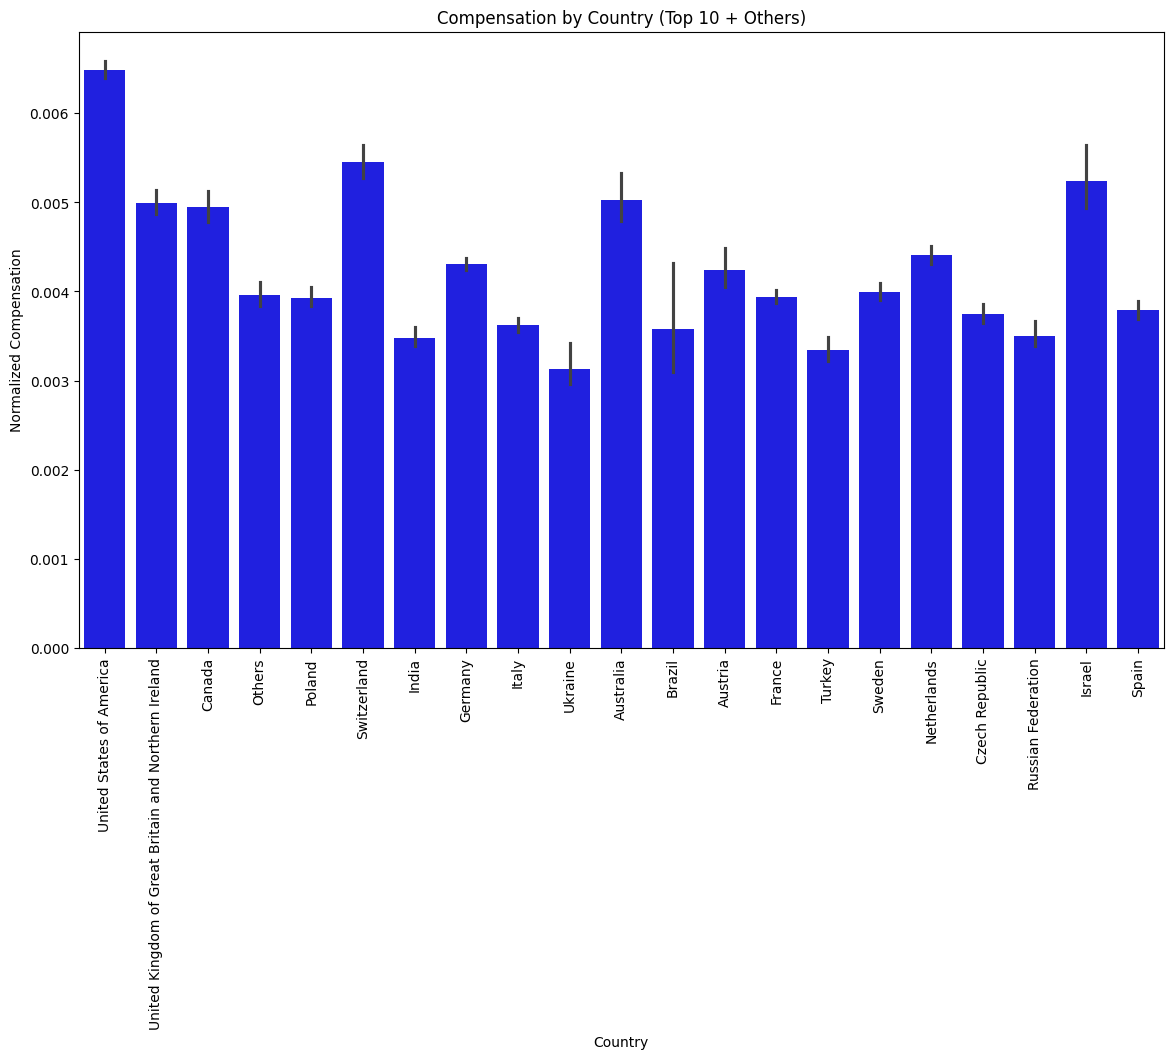

In [10]:
# Step 1: Identify the top countries 
top_countries = df_cleaned['Country'].value_counts().head(20).index

# Step 2: Create a new column with "Others" for countries not in the top 10
df_cleaned['Country_grouped'] = df_cleaned['Country'].apply(lambda x: x if x in top_countries else 'Others')

# Step 3: Create the boxplot using the new 'Country_grouped' column
plt.figure(figsize=(14, 8))
sns.barplot(x='Country_grouped', y='ConvertedCompYearly', data=df_cleaned, color='blue')
plt.title('Compensation by Country (Top 10 + Others)')
plt.xlabel('Country')
plt.ylabel('Normalized Compensation')
plt.xticks(rotation=90)
plt.show()


<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
